In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set_style(
    'whitegrid', 
    {
        'grid.color': '.95',
        'axes.spines.right': False,
        'axes.spines.top': False,
    }
)

params = {
    'axes.labelsize': 9,
    'axes.titlesize':9,
    'font.size': 9, 
    'legend.fontsize': 6,
    'xtick.labelsize': 9, 
    'ytick.labelsize': 9,
}

plt.rcParams.update(params)

In [151]:
positive = pd.read_csv('../../data/unlabelled_positive.csv')
positive_seq = positive['Sequence'].tolist()
positive_lengths = [len(seq) for seq in positive_seq]
positive_lengths_below100aa = [len(seq) for seq in positive_seq if len(seq) <= 100]
positive_lengths_below50aa = [len(seq) for seq in positive_seq if len(seq) <= 50]
positive_lengths_below25aa = [len(seq) for seq in positive_seq if len(seq) <= 25]



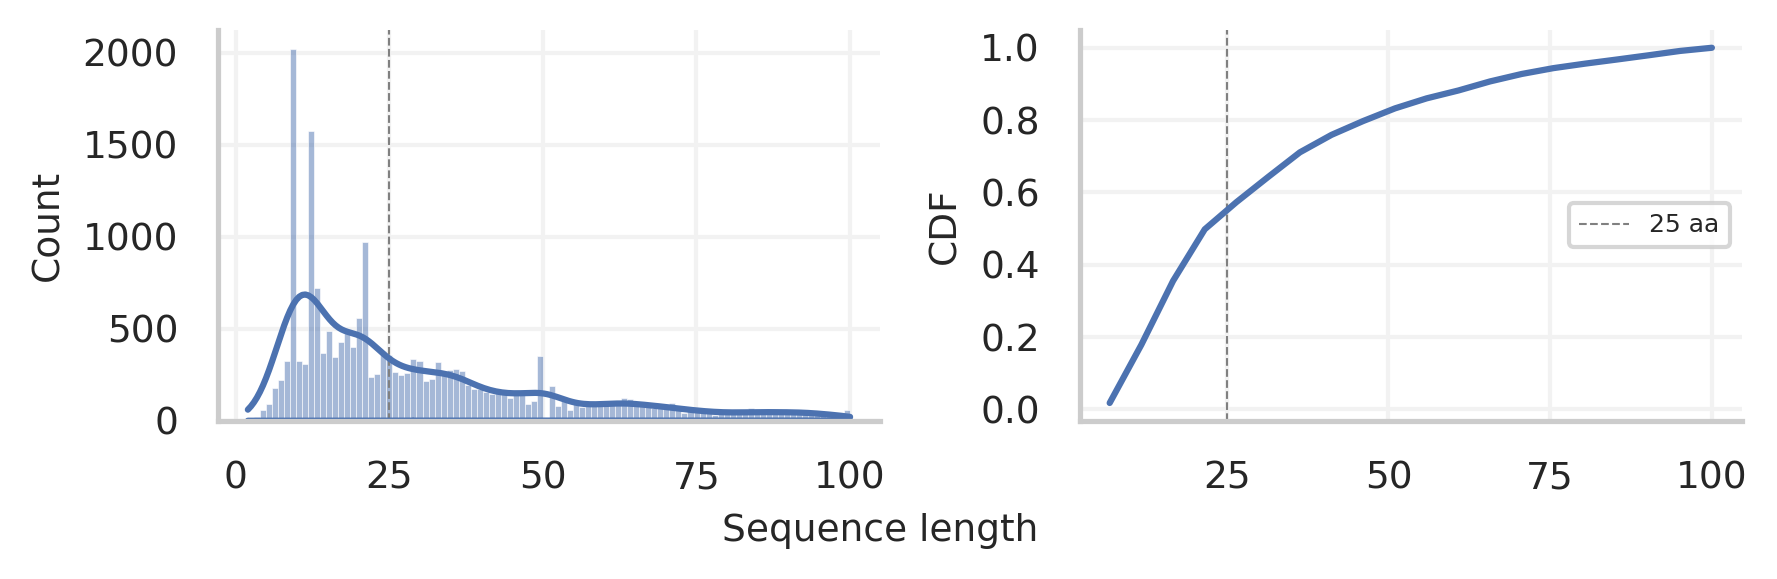

In [179]:
fig, (ax1, ax2) = plt.subplots(
    ncols=2, 
    nrows=1,
    figsize=(6, 2),
    dpi=300,
)

ax1.axvline(x = 25, color = 'grey', label = '25 aa', ls='--', lw=0.5,)


sns.histplot(positive_lengths_below100aa, bins=100, ax=ax1, kde=True)
sns.ecdfplot(data=positive_lengths_below100aa, ax=ax1)

# ax.set_title(f'< 100 aa, n={len(positive_lengths_below100aa)}')

ax1.set_xlabel('Sequence length')


ax2.axvline(x = 25, color = 'grey', label = '25 aa', ls='--', lw=0.5,)
count, bins_count = np.histogram(positive_lengths_below100aa, bins=20)
# pdf = count / sum(count)
cdf = np.cumsum(pdf)
# plotting PDF and CDF

# ax2.set_xticks(np.arange(0, 100, 10))
ax2.set_yticks(np.arange(0, 1.2, 0.2))
ax1.set_xlabel('Sequence length', x=1)

# ax.plot(bins_count[1:], pdf, color="red", label="PDF")
ax2.plot(bins_count[1:], cdf)
ax2.set_ylabel('CDF')

ax2.legend(loc='center right')

fig.tight_layout()
plt.show()

fig.savefig("../../../hydramp_revision/figures/aalength.svg", bbox_inches="tight")
fig.savefig("../../../hydramp_revision/figures/aalength.pdf", bbox_inches="tight")


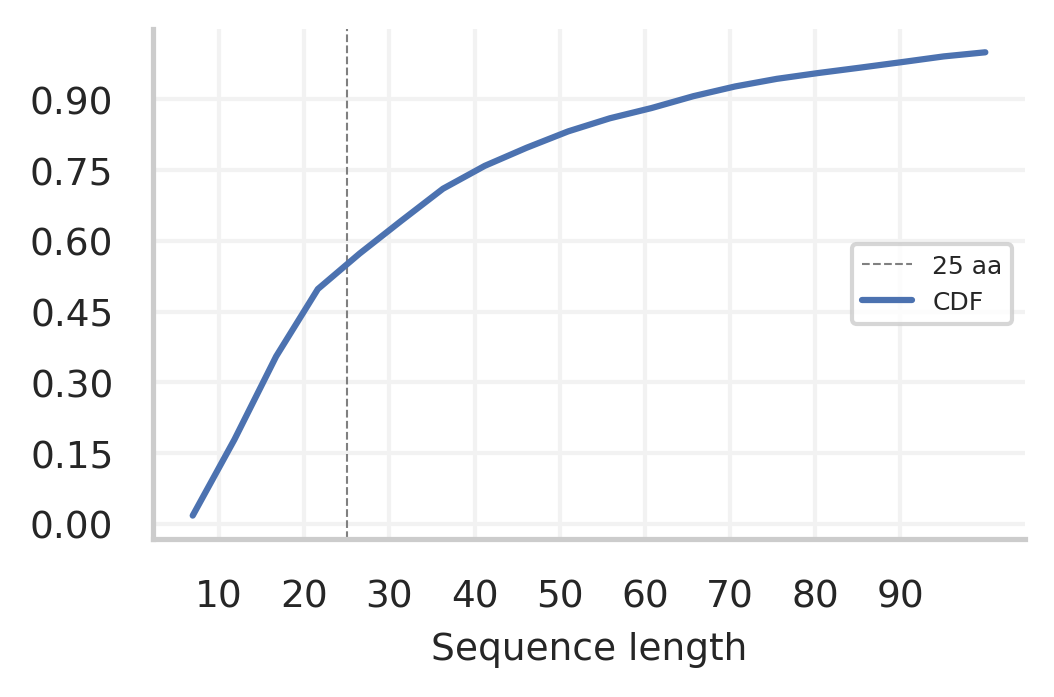

In [156]:
print(f'Number of all seqs: {len(positive_lengths)}')
print(f'Number of sequences with length < 100aa: {len(positive_lengths_below100aa)}')
print(f'Number of sequences with length < 25aa: {len(positive_lengths_below25aa)}')
print(f'The fraction of sequences with length < 100aa among all sequences: {len(positive_lengths_below100aa)/len(positive_lengths)}')
print(f'The fraction of sequences with length < 25aa among sequences <100aa: {len(positive_lengths_below25aa)/len(positive_lengths_below100aa)}')
print(f'The fraction of sequences with length < 25aa among all seqs: {len(positive_lengths_below25aa)/len(positive_lengths)}')


print(f'CDF at 25 aa is {cdf[4]}')

Number of all seqs: 20313
Number of sequences with length < 100aa: 19883
Number of sequences with length < 25aa: 11131
The fraction of sequences with length < 100aa among all sequences: 0.9788312903067001
The fraction of sequences with length < 25aa among sequences <100aa: 0.559824976110245
The fraction of sequences with length < 25aa among all seqs: 0.5479742037119086
CDF at 25 aa is 0.573203238947845


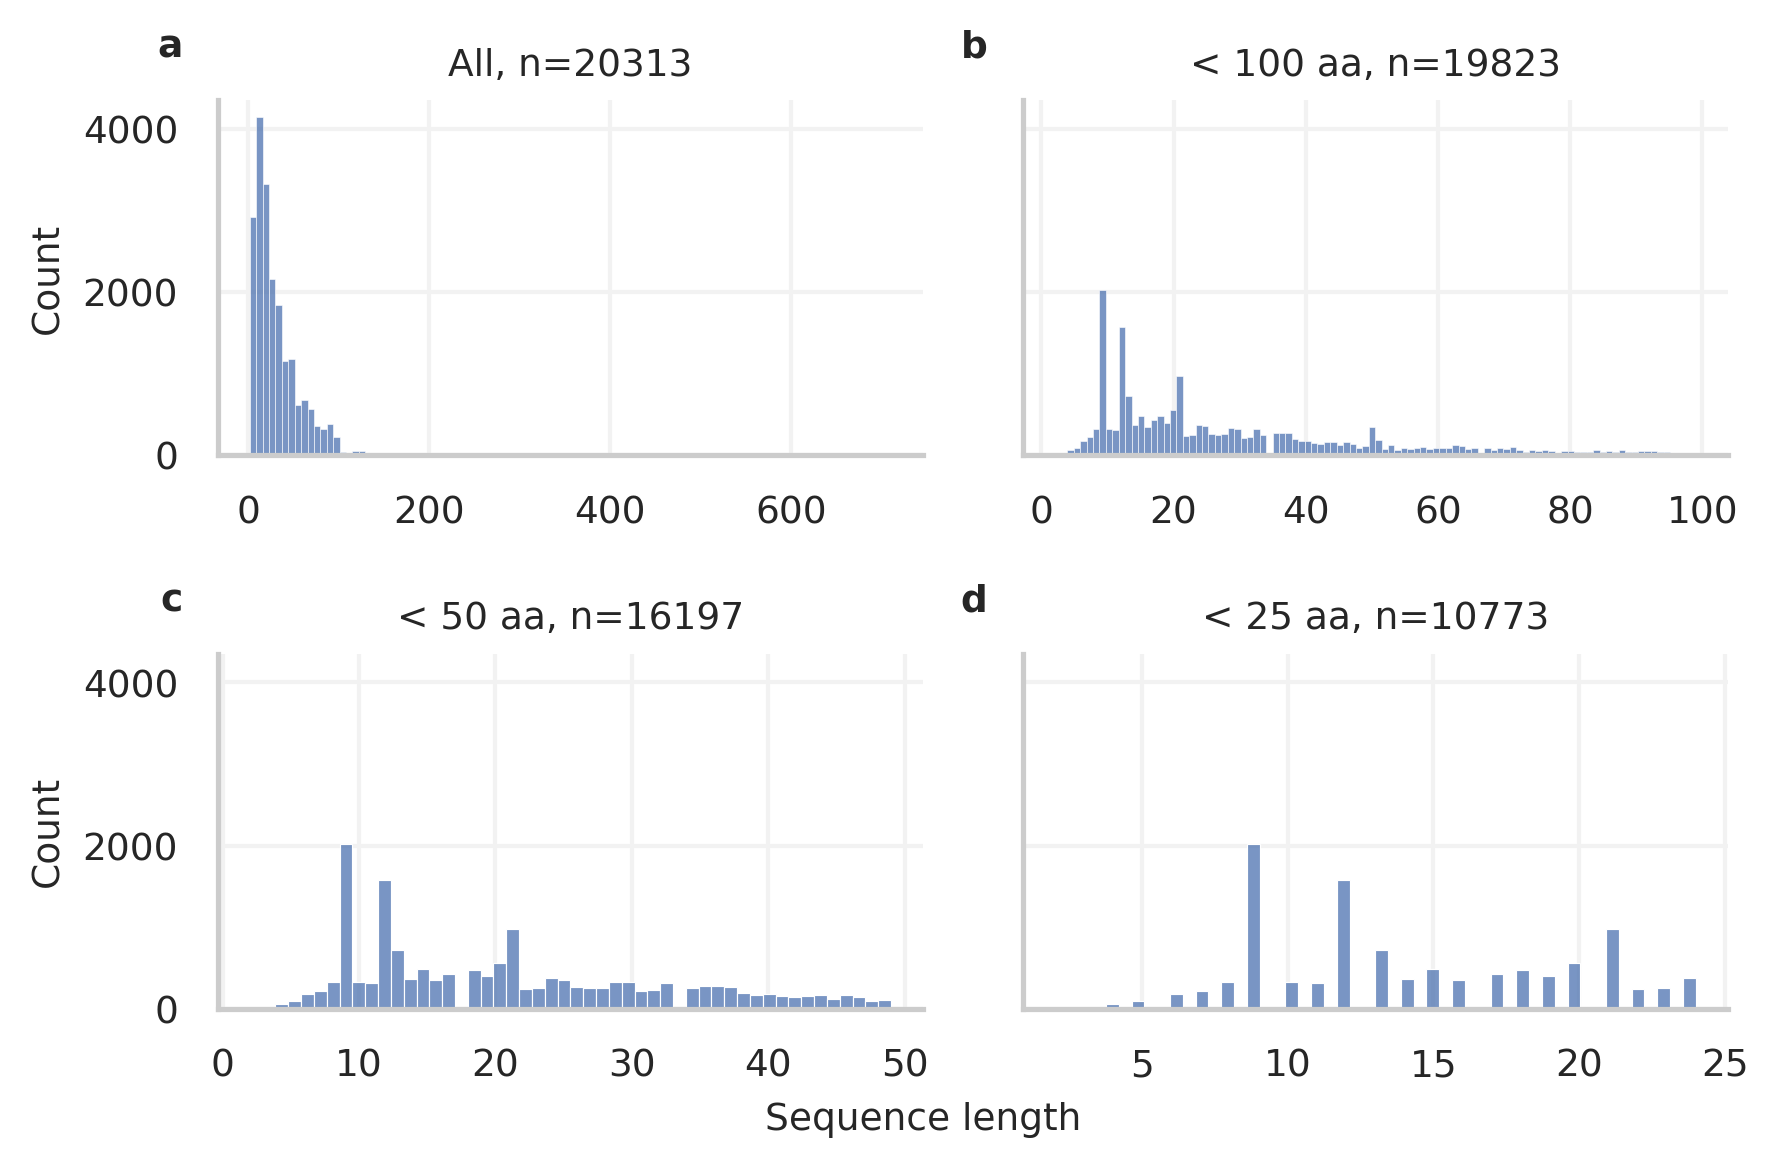

In [96]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    ncols=2, 
    nrows=2,
    figsize=(6, 4),
    dpi=300,
    sharey=True
)


sns.histplot(positive_lengths, bins=100, ax=ax1)
sns.histplot(positive_lengths_below100aa, bins=100, ax=ax2)
sns.histplot(positive_lengths_below50aa, bins=50, ax=ax3)
sns.histplot(positive_lengths_below25aa, bins=50, ax=ax4)



ax1.set_title(f'All, n={len(positive_lengths)}')
ax2.set_title(f'< 100 aa, n={len(positive_lengths_below100aa)}')
ax3.set_title(f'< 50 aa, n={len(positive_lengths_below50aa)}')
ax4.set_title(f'< 25 aa, n={len(positive_lengths_below25aa)}')



for i, (label, ax) in enumerate(zip(['a', 'b', 'c', 'd'], [ax1, ax2, ax3, ax4])):
    ax.annotate(
        label, 
        xy=(-0.05, 1.2),
        xycoords='axes fraction',
        fontweight='bold',
        va='top',
        ha='right'
    )


ax3.set_xlabel('Sequence length', x=1)
fig.tight_layout()

plt.show()